In [1]:
# Import the MNIST dataset
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('train_images: ' + str(train_images.shape))
print('train_labels: ' + str(train_labels.shape))
print('test_images: ' + str(test_images.shape))
print('test_labels: ' + str(test_labels.shape))

Using TensorFlow backend.


train_images: (60000, 28, 28)
train_labels: (60000,)
test_images: (10000, 28, 28)
test_labels: (10000,)


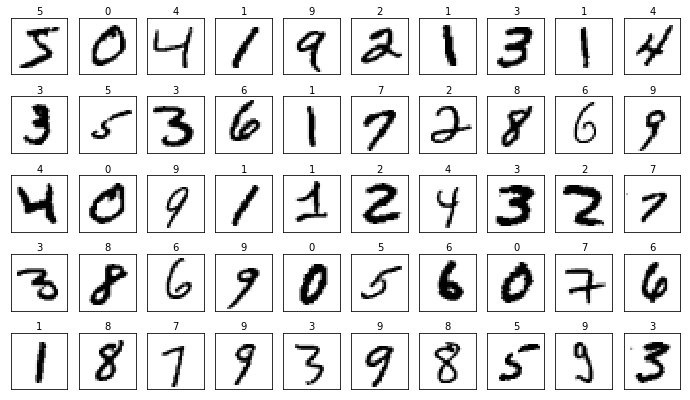

In [2]:
# Plot the first 50 images and show the corresponding labels
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap=plt.cm.gray_r)
    ax.text(0.45, 1.05, str(train_labels[i]), transform=ax.transAxes)

In [3]:
# Create a convolutional neural network with a softmax output layer for classification
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [4]:
# Prepare the input data
from keras.utils import to_categorical

test_image = test_images[11] # Save one image for making a prediction later
train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [5]:
# Train the model
hist = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1804 - acc: 0.9438 - val_loss: 0.0891 - val_acc: 0.9678
Epoch 2/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0521 - acc: 0.9846 - val_loss: 0.0289 - val_acc: 0.9913
Epoch 3/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0368 - acc: 0.9890 - val_loss: 0.0281 - val_acc: 0.9908
Epoch 4/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0291 - acc: 0.9911 - val_loss: 0.0247 - val_acc: 0.9917
Epoch 5/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0242 - acc: 0.9930 - val_loss: 0.0327 - val_acc: 0.9903
Epoch 6/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0212 - acc: 0.9932 - val_loss: 0.0313 - val_acc: 0.9908
Epoch 7/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0170 - acc: 0.9950 - val_loss: 0.0401 - val_acc

[]

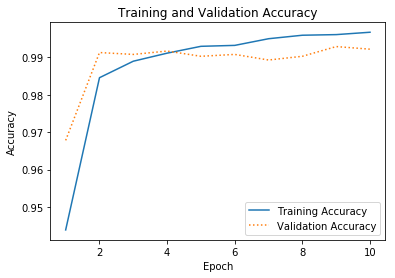

In [6]:
# Show training and validation accuracy over time
acc = hist.history['acc']
val_acc = hist.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [7]:
# Evaluate the model's accuracy
scores = model.evaluate(test_images, test_labels, verbose=0) 
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 99.22%


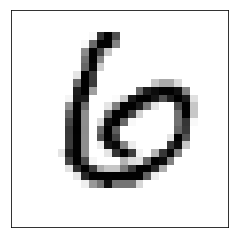

In [8]:
# Show the test image used to make a prediction
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(test_image, cmap=plt.cm.gray_r)

In [9]:
# Make a prediction using a test image
import numpy as np

test_image = test_images[11]
model.predict(np.array([test_image]))

array([[2.04852445e-14, 8.12092417e-23, 4.27243862e-26, 5.05293714e-20,
        2.31381908e-19, 1.08844144e-16, 1.00000000e+00, 2.49164789e-31,
        1.38232619e-13, 1.31948434e-22]], dtype=float32)

In [10]:
# Get the predicted class
predicted_class = model.predict_classes(np.array([test_image]))[0]
print('Looks like a ' + str(predicted_class) + '!')

Looks like a 6!
